What is the price distribution of menu items?

In [4]:
import os

os.chdir('C:/Users/esram/OneDrive/Desktop/esrabecode/delivery-market-analysis')

os.getcwd()


'C:\\Users\\esram\\OneDrive\\Desktop\\esrabecode\\delivery-market-analysis'

In [35]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('data/takeaway.db')

df = pd.read_sql_query("""
    SELECT price, COUNT(*) AS count
    FROM menuItems
    GROUP BY price
    ORDER BY price DESC;
    """, conn)
df

,price,count
0,150.00,32
1,149.99,1
2,147.00,1
3,145.00,5
4,144.00,2
...,...,...
1466,0.20,89
1467,0.15,1
1468,0.10,14
1469,0.01,3


In [37]:
df = pd.read_sql_query("SELECT price FROM menuItems;", conn)
summary = df['price'].describe()
print(summary)

count    403013.000000
mean          9.973233
std           8.384140
min           0.000000
25%           4.000000
50%           9.000000
75%          13.950000
max         150.000000
Name: price, dtype: float64


In [ ]:
max_price_row = pd.read_sql_query("""
SELECT *
FROM menuItems
WHERE price = (SELECT MAX(price) FROM menuItems);
""", conn)

max_price_row


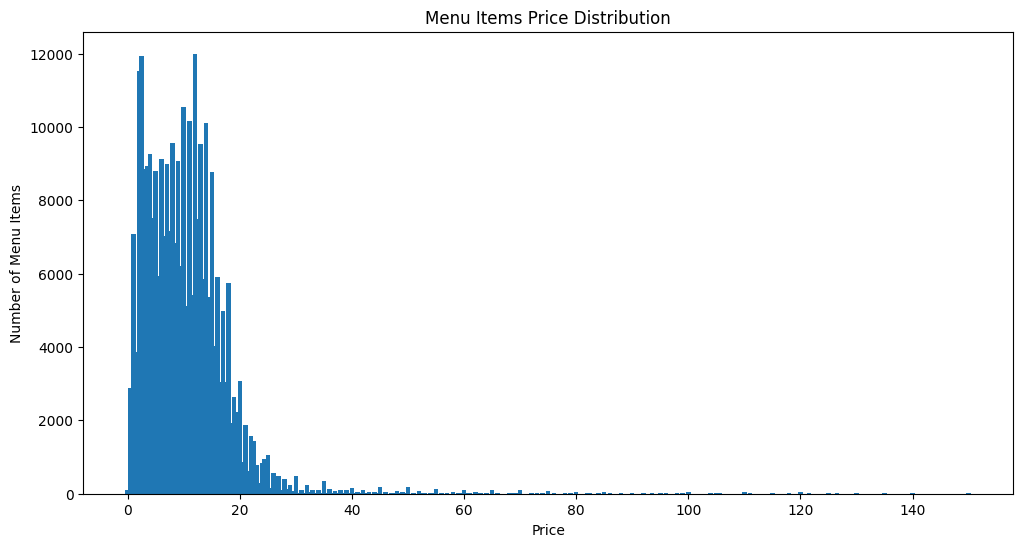

In [29]:
plt.figure(figsize=(12,6))
plt.bar(df['price'], df['count'])
plt.xlabel('Price')
plt.ylabel('Number of Menu Items')
plt.title('Menu Items Price Distribution')
plt.show()


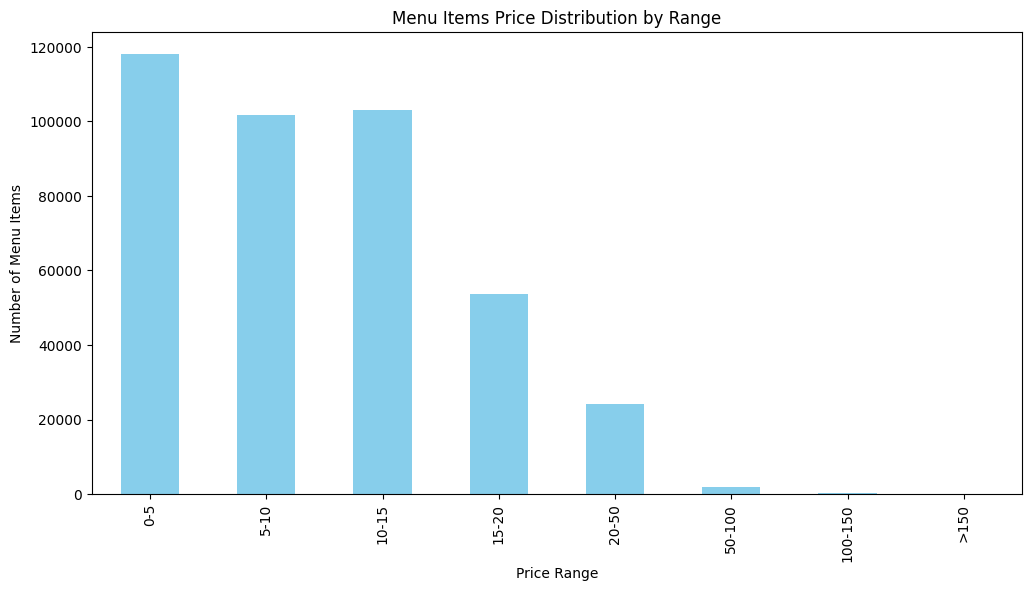

In [43]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_sql_query(
    "SELECT price " \
    "FROM menuItems;", conn)

bins = [0, 5, 10, 15, 20, 50, 100, 150, df['price'].max()+1]
labels = ['0-5', '5-10', '10-15', '15-20', '20-50', '50-100', '100-150', '>150']

df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

price_distribution = df['price_range'].value_counts().sort_index()

plt.figure(figsize=(12,6))
price_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Number of Menu Items')
plt.title('Menu Items Price Distribution by Range')
plt.show()
